In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
!pip install lightgbm
import lightgbm as lgb
import joblib

  Using cached lightgbm-4.3.0-py3-none-win_amd64.whl.metadata (19 kB)
Using cached lightgbm-4.3.0-py3-none-win_amd64.whl (1.3 MB)


In [3]:
df = pd.read_csv("FuelConsumption.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


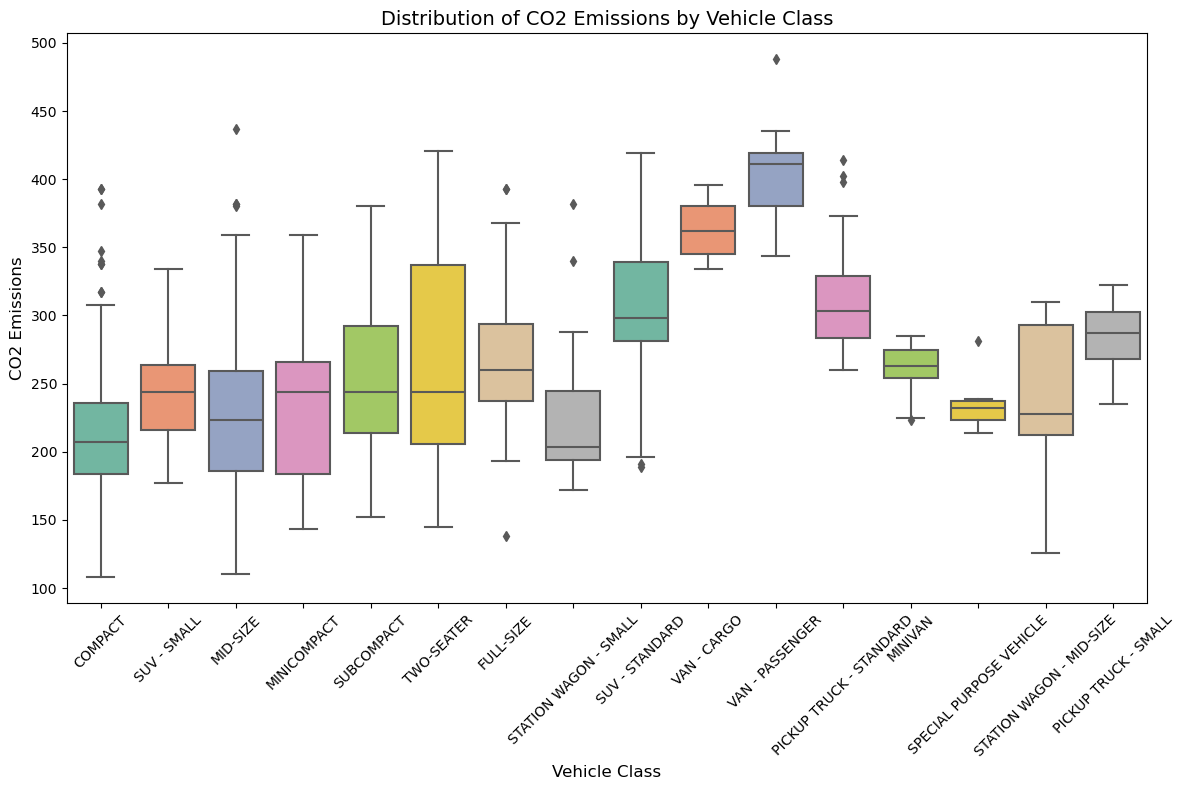

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='VEHICLECLASS', y='CO2EMISSIONS', palette='Set2')
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('CO2 Emissions', fontsize=12)
plt.title('Distribution of CO2 Emissions by Vehicle Class', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


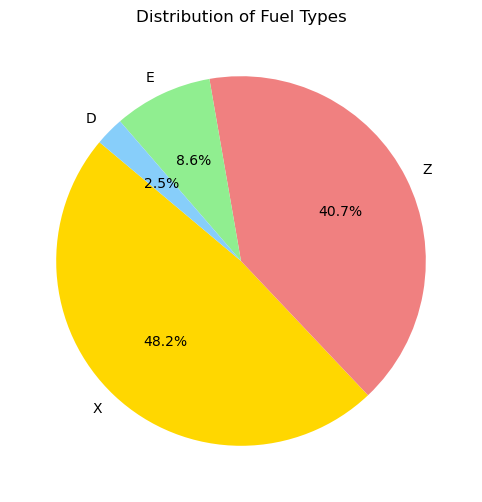

In [7]:
plt.figure(figsize=(8, 6))
sizes = df['FUELTYPE'].value_counts()
colors = ['gold', 'lightcoral', 'lightgreen', 'lightskyblue']  # Define colors for each category
plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Fuel Types')
plt.show()

In [8]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
target = 'CO2EMISSIONS'
cdf = df[features + [target]]

In [9]:
x = cdf[features]
y = cdf[target]

In [10]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(x, y)

lgb_regressor = lgb.LGBMRegressor(random_state=42)
lgb_regressor.fit(x, y)

lr_regressor = LinearRegression()
lr_regressor.fit(x, y)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 169
[LightGBM] [Info] Number of data points in the train set: 1067, number of used features: 3
[LightGBM] [Info] Start training from score 256.228679


LinearRegression()

In [11]:
joblib.dump(rf_regressor, 'random_forest_model.joblib')
joblib.dump(lgb_regressor, 'lightgbm_model.joblib')
joblib.dump(lr_regressor, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [12]:
rf_model = joblib.load('random_forest_model.joblib')
lgb_model = joblib.load('lightgbm_model.joblib')
lr_model = joblib.load('linear_regression_model.joblib')


In [13]:
sample_input = [[2.0, 4, 8.5]]


In [14]:
rf_prediction = rf_model.predict(sample_input)
lgb_prediction = lgb_model.predict(sample_input)
lr_prediction = lr_model.predict(sample_input)

print("Random Forest Prediction:", rf_prediction)
print("LightGBM Prediction:", lgb_prediction)
print("Linear Regression Prediction:", lr_prediction)

Random Forest Prediction: [196.]
LightGBM Prediction: [197.03032708]
Linear Regression Prediction: [198.56153371]


C:\Users\vamik\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\vamik\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


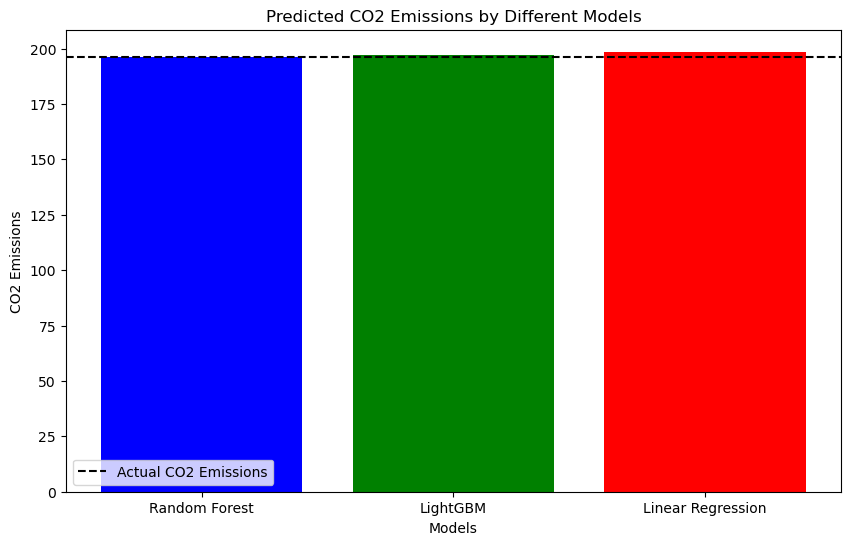

In [15]:
import matplotlib.pyplot as plt
import numpy as np


actual_value = cdf[target].iloc[0]


predictions = {'Random Forest': rf_prediction[0], 'LightGBM': lgb_prediction[0], 'Linear Regression': lr_prediction[0]}


plt.figure(figsize=(10, 6))
plt.bar(predictions.keys(), predictions.values(), color=['blue', 'green', 'red'])
plt.axhline(y=actual_value, color='black', linestyle='--', label='Actual CO2 Emissions') 
plt.xlabel('Models')
plt.ylabel('CO2 Emissions')
plt.title('Predicted CO2 Emissions by Different Models')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

def evaluate_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mae, mse, r2

rf_mae, rf_mse, rf_r2 = evaluate_model(rf_model, x_test, y_test)
print("Random Forest Metrics:")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R-squared:", rf_r2)

lgb_mae, lgb_mse, lgb_r2 = evaluate_model(lgb_model, x_test, y_test)
print("\nLightGBM Metrics:")
print("MAE:", lgb_mae)
print("MSE:", lgb_mse)
print("R-squared:", lgb_r2)

lr_mae, lr_mse, lr_r2 = evaluate_model(lr_model, x_test, y_test)
print("\nLinear Regression Metrics:")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("R-squared:", lr_r2)


Random Forest Metrics:
MAE: 1.9140712313387533
MSE: 37.99561128817195
R-squared: 0.9908110974348154

LightGBM Metrics:
MAE: 4.584100632374739
MSE: 90.06607828455034
R-squared: 0.9782183154915406

Linear Regression Metrics:
MAE: 16.657714558165242
MSE: 510.1072783691659
R-squared: 0.8766350660034011


In [17]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import lightgbm as lgb

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_random = RandomizedSearchCV(estimator=rf_regressor, param_distributions=rf_param_grid,
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(x_train, y_train)

best_rf_model = rf_random.best_estimator_

lgb_param_grid = {
    'num_leaves': [20, 30, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20],
    'min_child_samples': [10, 20, 30],
    'random_state': [42]  
}

lgb_random = RandomizedSearchCV(estimator=lgb.LGBMRegressor(), param_distributions=lgb_param_grid,
                                n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
lgb_random.fit(x_train, y_train)

best_lgb_model = lgb_random.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 160
[LightGBM] [Info] Number of data points in the train set: 853, number of used features: 3
[LightGBM] [Info] Start training from score 257.256741


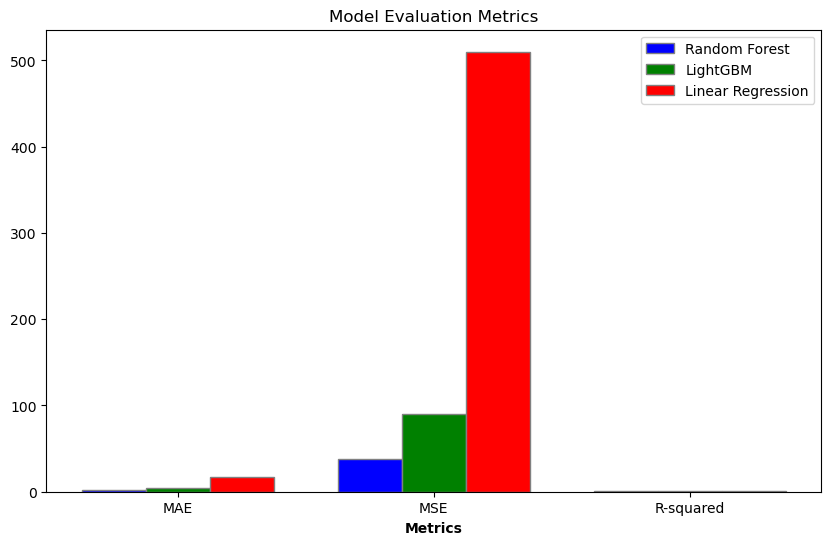

In [18]:
metrics = {'Random Forest': (rf_mae, rf_mse, rf_r2),
           'LightGBM': (lgb_mae, lgb_mse, lgb_r2),
           'Linear Regression': (lr_mae, lr_mse, lr_r2)}

plt.figure(figsize=(10, 6))
barWidth = 0.25
r1 = np.arange(len(metrics['Random Forest']))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.bar(r1, metrics['Random Forest'], color='blue', width=barWidth, edgecolor='grey', label='Random Forest')
plt.bar(r2, metrics['LightGBM'], color='green', width=barWidth, edgecolor='grey', label='LightGBM')
plt.bar(r3, metrics['Linear Regression'], color='red', width=barWidth, edgecolor='grey', label='Linear Regression')

plt.xlabel('Metrics', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(metrics['Random Forest']))], ['MAE', 'MSE', 'R-squared'])
plt.title('Model Evaluation Metrics')
plt.legend()
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score

rf_cv_results = cross_val_score(best_rf_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("Random Forest Cross-Validated MSE:", np.mean(rf_cv_results))

lgb_cv_results = cross_val_score(best_lgb_model, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
print("LightGBM Cross-Validated MSE:", np.mean(lgb_cv_results))


Random Forest Cross-Validated MSE: -126.63774143575651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 682, number of used features: 3
[LightGBM] [Info] Start training from score 256.244868
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 682, number of used features: 3
[LightGBM] [Info] Start training from score 258.239003
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 682, number 

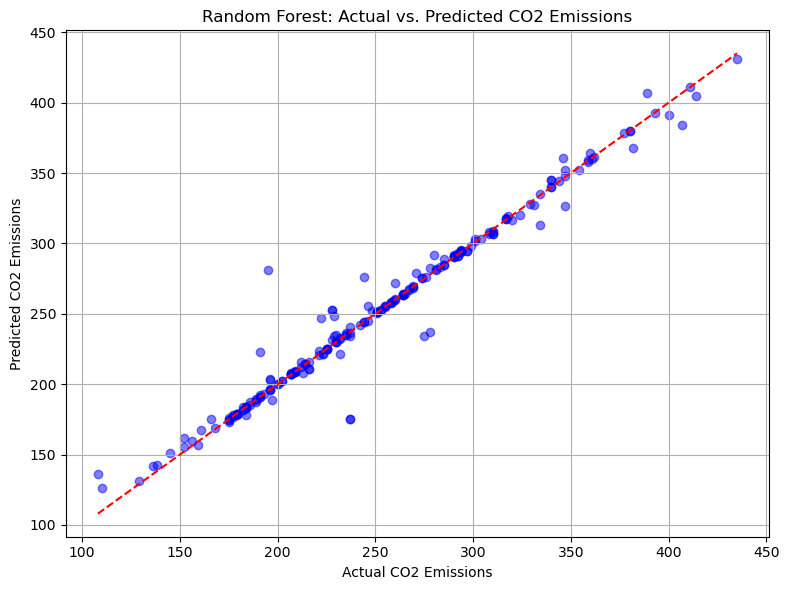

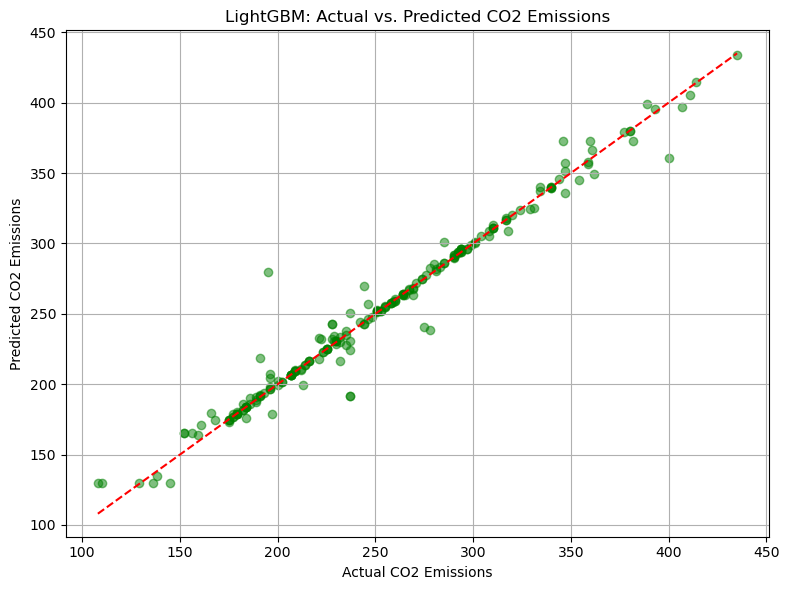

In [21]:

import matplotlib.pyplot as plt


rf_predictions = best_rf_model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, color='blue')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') 
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Random Forest: Actual vs. Predicted CO2 Emissions')
plt.grid(True)  
plt.tight_layout()
plt.show()


lgb_predictions = best_lgb_model.predict(x_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lgb_predictions, alpha=0.5, color='green')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('LightGBM: Actual vs. Predicted CO2 Emissions')
plt.grid(True) 
plt.tight_layout()
plt.show()

In [22]:
ensemble_prediction = (rf_prediction + lgb_prediction + lr_prediction) / 3
print("Ensemble Prediction:", ensemble_prediction)



Ensemble Prediction: [197.19728693]
